<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:

# Generate random input data
np.random.seed(0)
X = np.random.rand(1000, 3)

X

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       ...,
       [0.47521403, 0.28729288, 0.87968154],
       [0.28492705, 0.94168707, 0.54613275],
       [0.32361371, 0.81354502, 0.69740038]])

In [3]:
# Define the true function
def true_fun(X):
    return np.sin(1.5 * np.pi * X[:, 0]) + np.cos(1.5 * np.pi * X[:, 1]) + 2 * X[:, 2]


In [4]:
# Generate output data
y = true_fun(X) + np.random.normal(0, 0.1, size=1000)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [5]:
#The second call to train_test_split is used to further divide the training set into 80% training and 20% validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)


In [6]:
# Define the model
model = Sequential()
model.add(Dense(30, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])


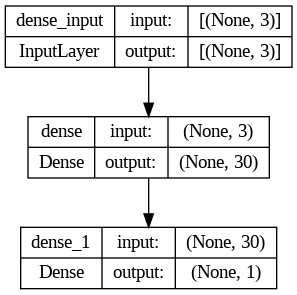

In [10]:
from tensorflow import keras
#Below is the MLP Architecture used.
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [25]:
history = model.fit(X_train, y_train, epochs=500,
                    batch_size=30, validation_data=(X_val, y_val))




Epoch 1/500
22/22 [==============================] - 1s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.1310 - val_loss: 0.0258 - val_mean_absolute_error: 0.1285
Epoch 2/500
22/22 [==============================] - 0s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.1319 - val_loss: 0.0255 - val_mean_absolute_error: 0.1274
Epoch 3/500
22/22 [==============================] - 0s 11ms/step - loss: 0.0260 - mean_absolute_error: 0.1293 - val_loss: 0.0248 - val_mean_absolute_error: 0.1248
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.1294 - val_loss: 0.0259 - val_mean_absolute_error: 0.1301
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0260 - mean_absolute_error: 0.1295 - val_loss: 0.0252 - val_mean_absolute_error: 0.1276
Epoch 6/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.1285 - val_loss: 0.0243 - val_mean_absolute_error: 0.1239
Epoch 7/500
22/22 [

In [26]:
predictions = model.predict(X_test)



7/7 [==============================] - 0s 2ms/step


In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

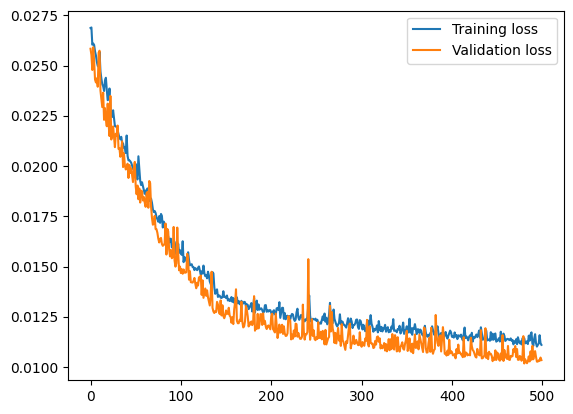

In [28]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()



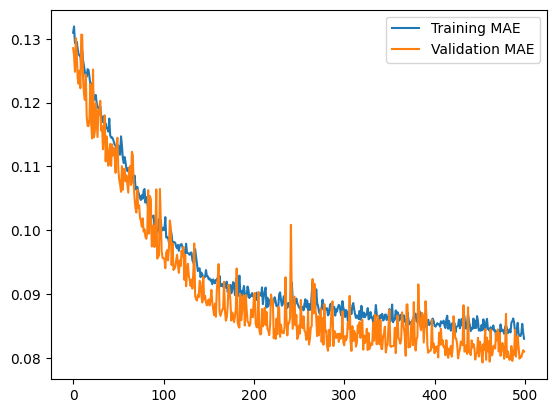

In [29]:
# Plot the training and validation accuracy
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.legend()
plt.show()